In [10]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
# data_20 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_4_23/2023_01_04_23_50_22L20.npy',allow_pickle=True).tolist()
# data_24 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_4_23/2023_01_04_23_50_22L24.npy',allow_pickle=True).tolist()
# data_28 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_4_23/2023_01_04_23_50_24L28.npy',allow_pickle=True).tolist()
# data_32 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_4_23/2023_01_04_23_50_22L32.npy',allow_pickle=True).tolist()

data_20 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_5_23/2023_01_05_23_48_55L20.npy',allow_pickle=True).tolist()
data_24 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_5_23/2023_01_05_23_48_55L24.npy',allow_pickle=True).tolist()
data_28 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_5_23/2023_01_05_23_48_55L28.npy',allow_pickle=True).tolist()
data_32 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_5_23/2023_01_05_23_48_55L32.npy',allow_pickle=True).tolist()


# #slower ramp after the critical point
# data_20 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L20.npy',allow_pickle=True).tolist()
# data_24 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L24.npy',allow_pickle=True).tolist()
# data_28 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L28.npy',allow_pickle=True).tolist()
# data_32 = np.load('C:/Users/wangy/Rydberg simulation/rydberg_data/1_12_23/2023_01_12_00_42_03L32.npy',allow_pickle=True).tolist()

In [11]:
# data = [data_20,data_24,data_28,data_32]
# N = [20,24,28,32]
data = [data_20,data_24,data_28,data_32]
N = [20,24,28,32]
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []

for i in range(len(N)):
    t.append(np.array(data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(data[i]['z'])) # rydberg population  
    zz_list.append(np.array(data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print(zzg_list[i].shape)

i 0
(213, 20, 20)
i 1
(213, 24, 24)
i 2
(213, 28, 28)
i 3
(213, 32, 32)


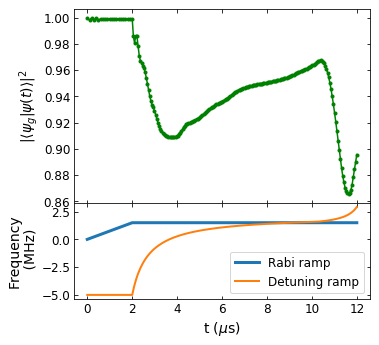

In [12]:
from matplotlib import gridspec
fig = plt.subplots(figsize= (5.8,4.8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ax = np.array([plt.subplot(gs[i]) for i in range(2)])
ms = 3
ls = '-'
ax[1].plot(t[0],rabi[0],marker='',markersize = ms,ls = ls,label = 'Rabi ramp',linewidth=3)
ax[1].plot(t[0],detuning[0],marker='',markersize = ms,ls = ls,label = 'Detuning ramp',linewidth=2)
#ax[1].set_xlim([0,10.28])
ax[1].legend()
ax[1].set_xlabel('t ($\mu$s)',fontsize=14)
ax[1].set_ylabel('Frequency\n (MHz)',fontsize=14)
#ax[1].set_title('Parameter setting')
#ax[0].set_xlabel('t (us)')
ax[0].set_ylabel('$|\langle\psi_g|\psi(t)\\rangle|^2$',fontsize=14)

ax[0].plot(t[0],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,color='green')
#ax[0].set_xlim([0,10.28])
ax[0].set_xticklabels([])

ax[0].get_xaxis().set_ticks_position('both')
ax[0].get_yaxis().set_ticks_position('both')
ax[1].get_xaxis().set_ticks_position('both')
ax[1].get_yaxis().set_ticks_position('both')
legend = ax[0].get_legend()
ax[0].tick_params(direction='in',labelsize=12)
ax[1].tick_params(direction='in',labelsize=12)
handles, labels = ax[0].get_legend_handles_labels()
ax[1].legend(fontsize=12,frameon=True)
    
plt.subplots_adjust(left=0.24, bottom=0.11, right=0.95, top=0.95, wspace=0, hspace=0)
plt.savefig("test1.svg")

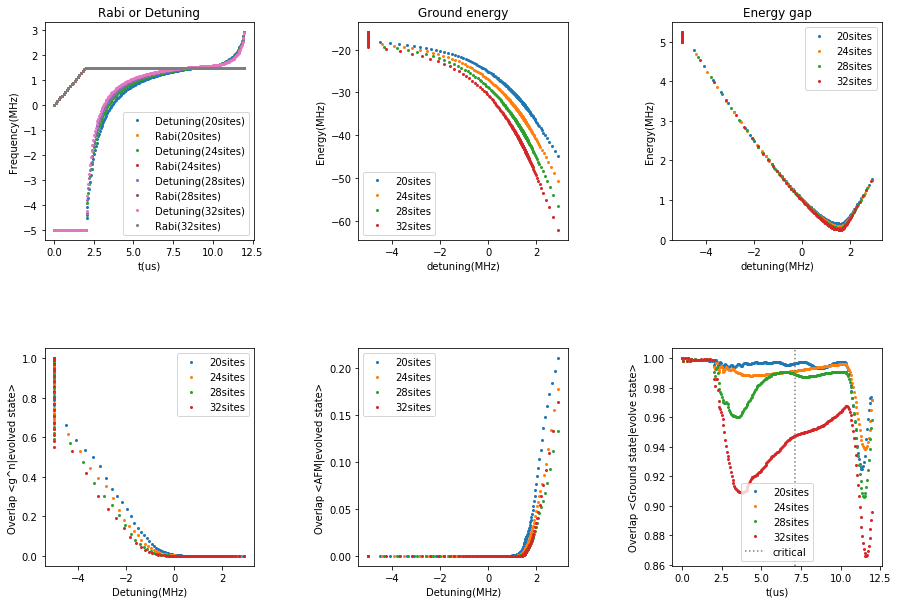

In [13]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

for i in range(len(N)):

    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning('+str(N[i])+'sites)' )
    ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi('+str(N[i])+'sites)')
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= str(N[i])+'sites')
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= str(N[i])+'sites')
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= str(N[i])+'sites')
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= str(N[i])+'sites')
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= str(N[i])+'sites')
    



ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



In [14]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    print('N =',N[i])
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][0]))
    print('intial_gap'+str(gap[0]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))

len(t[0])    
          
        

i = 0
N = 20
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  179
crit_t10.267999999999954
crit_detuning1.5936501072683718
crit_gap0.39673115429816347
final_detuning2.920793662121756
final_gap1.519899581123548
i = 1
N = 24
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  178
crit_t10.215999999999955
crit_detuning1.5900120830033118
crit_gap0.3313994293089672
final_detuning2.9116124548185978
final_gap1.503624669018495
i = 2
N = 28
intial_detuning-5.0
intial_gap4.9999999999999964
crit_id  176
crit_t10.111999999999956
crit_detuning1.586694032723815
crit_gap0.2844854968707166
final_detuning2.9055595948101995
final_gap1.4929663434007814
i = 3
N = 32
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  175
crit_t10.059999999999956
crit_detuning1.5852980409308142
crit_gap0.24917479447484442
final_detuning2.893848120634081
final_gap1.4776388749952853


213

In [15]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(data[i]['zz'])):
        n_temp = np.array(data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)


In [16]:
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(data[i]['zg'])):
        n_temp = np.array(data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

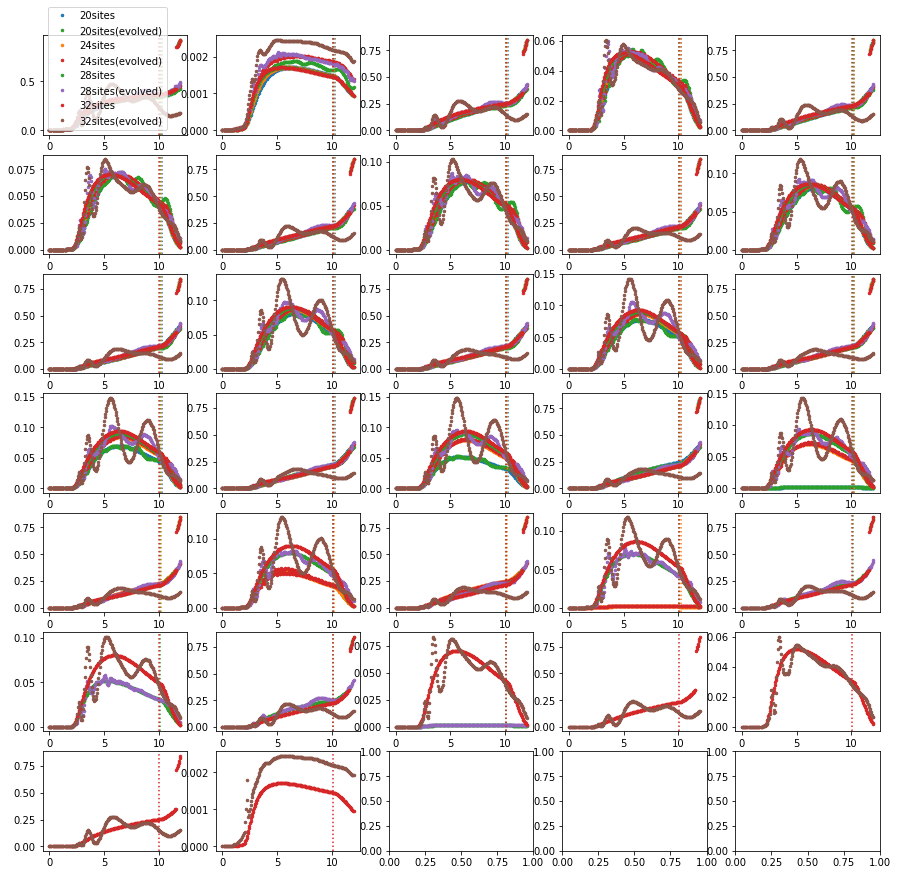

In [17]:
# rydberg state correlation with site m

fig, ax = plt.subplots(7, 5, figsize=(15,15))
m = 0
ms = 5
for j_n, j in enumerate(range(len(N))):
    
    for i in range(N[j]):
#         print(t[j])
#         print(zzg_list[j][:,m,i])
        ax[i//5,i%5].axvline(t[j][crit_id_list[j]],markersize = ms,ls = ':',color = 'C%d'%j_n)
        ax[i//5,i%5].plot(t[j],zzg_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= str(N[j])+'sites')        
        ax[i//5,i%5].plot(t[j],zz_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%(j_n+2),ls = '',label= str(N[j])+'sites(evolved)')

        

       # ax[i//5,i%5].set_ylim([-0.1,1])
ax[0,0].legend()

20
24
28
32


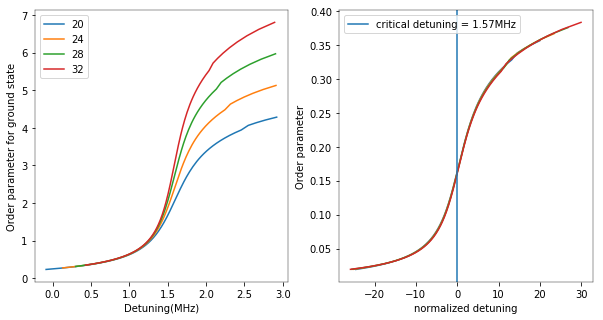

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
for i_n,i in enumerate(range(len(N))):
    print(len(x_list[i]))
    temp = sigma_2_g_list[i]
    ax[0].plot(detuning[i][50:],np.sum(temp,axis=1)[50:],label = N[i])
    

    ax[1].plot((detuning[i][50:]-1.57)*len(x_list[i])**0.9,np.sum(temp,axis=1)[50:]/len(x_list[i])**0.83)
#plt.yscale('log')
ax[0].legend()
ax[1].axvline(0,label ='critical detuning = 1.57MHz')
ax[0].set_xlabel('Detuning(MHz)')
ax[0].set_ylabel('Order parameter for ground state')
ax[1].set_xlabel('normalized detuning')
ax[1].set_ylabel('Order parameter')
ax[1].legend()
#plt.ylim([0.1,0.8])

In [19]:
detuning[i][50:]

array([0.42867659, 0.46708547, 0.5035907 , 0.53833038, 0.57142958,
       0.6030018 , 0.63315035, 0.66196938, 0.68954495, 0.71595584,
       0.7412743 , 0.76556675, 0.7888943 , 0.81131334, 0.83287592,
       0.85363019, 0.87362078, 0.89288908, 0.91147353, 0.9294099 ,
       0.94673152, 0.96346946, 0.97965273, 0.99530845, 1.010462  ,
       1.02513717, 1.03935626, 1.0531402 , 1.06650866, 1.07948015,
       1.0920721 , 1.10430093, 1.11618211, 1.12773026, 1.1389592 ,
       1.14988197, 1.16051094, 1.17085779, 1.18093362, 1.19074893,
       1.2003137 , 1.2096374 , 1.21872903, 1.22759715, 1.2362499 ,
       1.24469504, 1.25293994, 1.26099164, 1.26885686, 1.276542  ,
       1.28405318, 1.29139623, 1.29857675, 1.30560005, 1.31247126,
       1.31919526, 1.32577674, 1.33222016, 1.33852984, 1.3447099 ,
       1.35076429, 1.35669679, 1.36251107, 1.36821061, 1.37379878,
       1.37927882, 1.38465382, 1.38992679, 1.3951006 , 1.40017801,
       1.40516171, 1.41005426, 1.41485814, 1.41957574, 1.42420

20
24
28
32


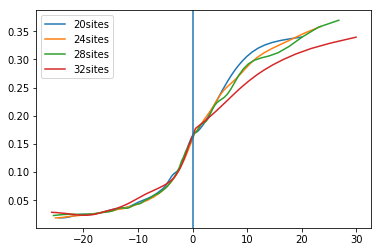

In [20]:
for i_n,i in enumerate(range(len(N))):
    print(len(x_list[i]))
    temp = sigma_2_list[i]
    plt.plot((detuning[i][50:]-1.57)*len(x_list[i])**0.9,np.sum(temp,axis=1)[50:]/len(x_list[i])**0.83,label= str(N[i])+'sites')
#plt.yscale('log')
plt.legend()
plt.axvline(0)
#plt.ylim([0.1,0.8])

20
24
28
32


Text(0, 0.5, 'AFM order parameter')

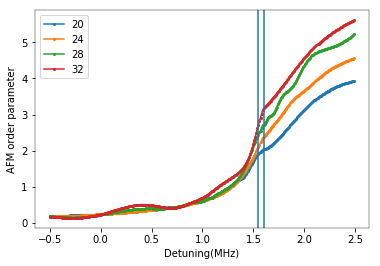

In [93]:
sampled_x = np.arange(-0.5,2.5,0.01)
sampled_y = []
for i_n,i in enumerate(range(len(N))):
#for i_n,i in enumerate([0,1,3]):
    print(len(x_list[i]))
    temp = sigma_2_list[i]
    x = detuning[i][20:]
    y = np.sum(temp,axis=1)[20:]
    interp_func = interp1d(x, y)
    interp_y = interp_func(sampled_x)
    sampled_y.append(interp_y)
   # plt.plot(x,y,marker = '^',markersize = 2, ls ='',label = N[i])
    plt.plot(sampled_x,interp_y,marker = 'o',markersize = 2,ls ='-',label = N[i])
#plt.yscale('log')
plt.axvline(1.6)
plt.legend()
plt.axvline(1.55)
sampled_y = np.array(sampled_y)
plt.xlabel('Detuning(MHz)')
plt.ylabel('AFM order parameter')
#plt.ylim([0.1,0.8])

In [94]:
# generate artificial scaling data from master curve
 # with rho_c == 1.0, nu == 2.0, zeta == 0.0
l = N
#l = [N[i] for i in [0,1,3]]
rho = sampled_x
l_mesh, rho_mesh = np.meshgrid(l, rho, indexing='ij')
y = sampled_y
dy = y / 10.
a = y
da = dy
res = fssa.autoscale(l=l, rho=rho, a=a, da=da, rho_c0=1.58, nu0=1., zeta0=1.)
res

           dnu: 1.0329167507725912
          drho: 0.9713094035219463
         dzeta: nan
        errors: array([0.9713094 , 1.03291675,        nan])
 final_simplex: (array([[1.57234763, 1.76278364, 1.26799222],
       [1.56766016, 1.75699693, 1.25946825],
       [1.57300073, 1.76233691, 1.27009109],
       [1.56887105, 1.76163007, 1.26349271]]), array([0.89869371, 0.89881051, 0.89911558, 0.90060367]))
           fun: 0.8986937111642942
       message: 'Optimization terminated successfully.'
          nfev: 83
           nit: 43
            nu: 1.762783635000607
           rho: 1.5723476313429154
        status: 0
       success: True
         varco: array([[ 0.94344196,  0.98204579,  1.19141774],
       [ 0.98204579,  1.06691701,  1.56910805],
       [ 1.19141774,  1.56910805, -2.72470406]])
             x: array([1.57234763, 1.76278364, 1.26799222])
          zeta: 1.267992222766726

In [95]:
print(res.zeta,res.dzeta)
print(res.nu,res.dnu)
print(res.rho,res.drho)

1.267992222766726 nan
1.762783635000607 1.0329167507725912
1.5723476313429154 0.9713094035219463


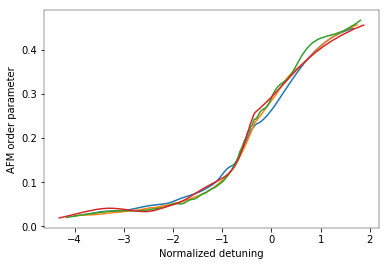

In [82]:
auto_scaled_data = fssa.scaledata(l, rho, a, da, res.rho, res.nu, res.zeta)
fig, ax = plt.subplots()
for i in range(len(auto_scaled_data.x)):
    ax.plot(auto_scaled_data.x[i,:],auto_scaled_data.y[i,:])

ax.set_xlabel('Normalized detuning')
ax.set_ylabel('AFM order parameter')

plt.show()

In [25]:
print(res.rho, res.nu, res.zeta)

1.7356708496647517 3.807570095835819 2.7573104769748946


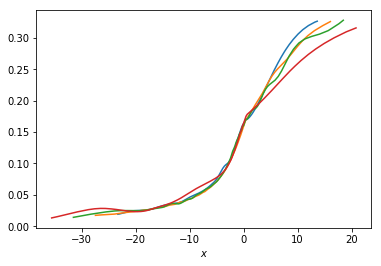

In [26]:
auto_scaled_data = fssa.scaledata(l, rho, a, da, 1.57, 1/0.9, 0.83/0.9)
fig, ax = plt.subplots()
for i in range(len(auto_scaled_data.x)):
    ax.plot(auto_scaled_data.x[i,:],auto_scaled_data.y[i,:])

ax.set_xlabel(r'$x$')
plt.show()

# for i_n,i in enumerate(range(len(N))):
#     print(len(x_list[i]))
#     temp = sigma_2_g_list[i]
#     plt.plot((detuning[i][50:]-1.57)*len(x_list[i])**0.9,np.sum(temp,axis=1)[50:]/len(x_list[i])**0.83)
# #plt.yscale('log')
# plt.axvline(0)
# #plt.ylim([0.1,0.8])

In [27]:
auto_scaled_data = fssa.scaledata(l, rho, a, da, 0, 0, 0)
fig, ax = plt.subplots()
for i in range(len(auto_scaled_data.x)):
    ax.plot(auto_scaled_data.x[i,:],auto_scaled_data.y[i,:])

ax.set_xlabel(r'$x$')
plt.show()

# for i_n,i in enumerate(range(len(N))):
#     print(len(x_list[i]))
#     temp = sigma_2_g_list[i]
#     plt.plot((detuning[i][50:]-1.57)*len(x_list[i])**0.9,np.sum(temp,axis=1)[50:]/len(x_list[i])**0.83)
# #plt.yscale('log')
# plt.axvline(0)
# #plt.ylim([0.1,0.8])

ZeroDivisionError: float division by zero

In [ ]:
for i_n,i in enumerate(range(len(N))):
    print(len(x_list[i]))
    temp = sigma_2_list[i]
    plt.plot(detuning[i][50:],np.sum(temp,axis=1)[50:]/len(x_list[i])**0.5)
#plt.yscale('log')
plt.axvline(1.55)
#plt.ylim([0.1,0.8])

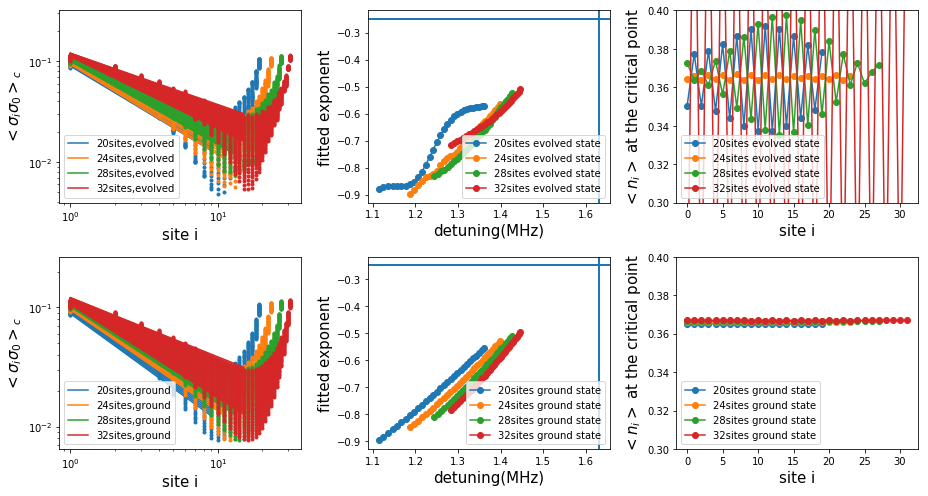

In [28]:
fs = 15
def power_law(x, a, b):
    return a * x**b
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(13,7))
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
for i_n,i in enumerate(range(len(N))):
    ax[0,0].plot([],[],label = str(N[i])+'sites,evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = str(N[i])+'sites,ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    for it,t_id in enumerate(range(100,130,1)):
        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)

        ax[0,0].plot(xfit, yfit, '-',color='C%d'%i_n)
        ax[1,0].plot(xfit_g, yfit_g, '-',color='C%d'%i_n)

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= str(N[i])+'sites'+' evolved state',marker = 'o')
    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= str(N[i])+'sites'+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= str(N[i])+'sites'+' evolved state')
    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= str(N[i])+'sites'+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend()
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

    ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()
    ax[0,1].axvline(1.63)
    ax[1,1].axvline(1.63)
    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
 #   plt.suptitle('ground state',fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

In [344]:
t_id_range = range(189,190,1)
t_id_range[1]

IndexError: range object index out of range

In [ ]:
# benchmark ground state dynamics 
ms = 5
ls = ':'
fig, ax = plt.subplots(4, 5, figsize=(15,10))
for i in range(N[0]):
    ax[0,0].plot(t[0],z_list[0][:,i],markersize = ms,ls = ls,label='site'+str(i+1))
    ax[i//5,i%5].legend()

In [41]:
np.array([detuning_list,exponent_g]).T

array([[ 1.54941623, -0.28660661],
       [ 1.55203258, -0.28171984],
       [ 1.55461413, -0.27694049],
       [ 1.55716157, -0.27226757],
       [ 1.55967557, -0.26769941],
       [ 1.56215677, -0.26323444],
       [ 1.56460583, -0.25887057],
       [ 1.56702336, -0.25460385],
       [ 1.56940997, -0.25043612],
       [ 1.57176624, -0.24636291],
       [ 1.57409275, -0.24238577],
       [ 1.57639006, -0.23850006],
       [ 1.57865872, -0.23470115],
       [ 1.58089926, -0.23099013],
       [ 1.5831122 , -0.22736789],
       [ 1.58529804, -0.2238291 ],
       [ 1.58745728, -0.22037214],
       [ 1.58959041, -0.21699684],
       [ 1.59169789, -0.2137006 ],
       [ 1.59378019, -0.21047923],
       [ 1.60005095, -0.20101109],
       [ 1.60716219, -0.19069111],
       [ 1.61466185, -0.18029145],
       [ 1.62258265, -0.1698574 ],
       [ 1.63096108, -0.15942641],
       [ 1.639838  , -0.14904746],
       [ 1.64925924, -0.13876503],
       [ 1.65927646, -0.12863657],
       [ 1.66994805,

20 [[ 1.47882457 -0.38247004]
 [ 1.48355013 -0.37332241]
 [ 1.48821084 -0.36418208]
 [ 1.49280801 -0.35514821]
 [ 1.49734294 -0.34621991]
 [ 1.50181689 -0.33732319]
 [ 1.50623107 -0.32846036]
 [ 1.51058668 -0.31979518]
 [ 1.51488487 -0.31154881]
 [ 1.51912678 -0.30390964]
 [ 1.5233135  -0.29669424]
 [ 1.5274461  -0.28980101]
 [ 1.53152562 -0.28349267]
 [ 1.53555308 -0.27799399]
 [ 1.53952947 -0.2731053 ]
 [ 1.54345576 -0.26852789]
 [ 1.54733288 -0.26439341]
 [ 1.55116176 -0.26098527]
 [ 1.55494328 -0.25821811]
 [ 1.55867833 -0.25568224]
 [ 1.56236775 -0.25316277]
 [ 1.56601238 -0.25105369]
 [ 1.56961302 -0.24944111]
 [ 1.57317047 -0.24799231]
 [ 1.57668549 -0.24640387]
 [ 1.58015885 -0.24479839]
 [ 1.58359129 -0.24345065]
 [ 1.58698351 -0.2422811 ]
 [ 1.59033622 -0.24091591]
 [ 1.59365011 -0.23912362]
 [ 1.60353428 -0.23729583]
 [ 1.61467744 -0.23589558]
 [ 1.62635754 -0.23436866]
 [ 1.63861435 -0.23209038]
 [ 1.65149165 -0.22912268]
 [ 1.66503778 -0.22554188]
 [ 1.67930626 -0.22090133

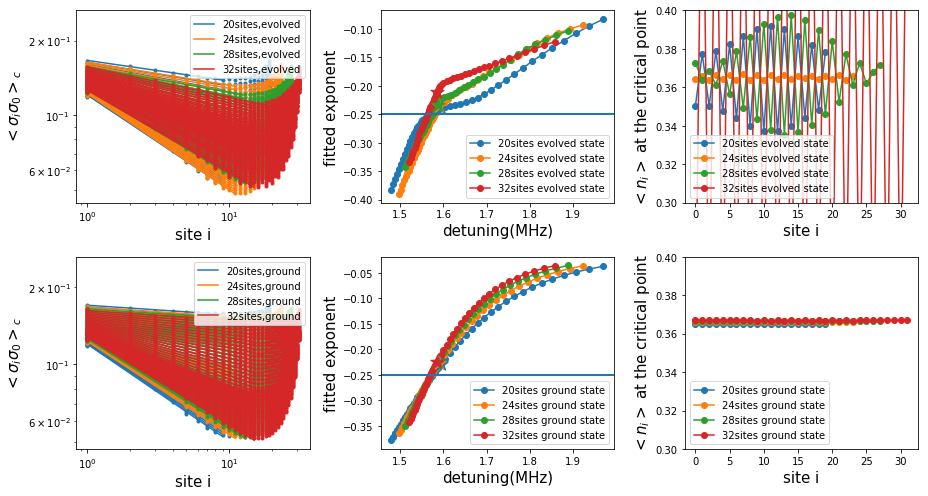

In [44]:
# plot for ground state
fs = 15
def power_law(x, a, b):
    return a * x**b
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(13,7))
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
for i_n,i in enumerate(range(len(N))):
    ax[0,0].plot([],[],label = str(N[i])+'sites,evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = str(N[i])+'sites,ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    for it,t_id in enumerate(range(150,200,1)):
        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '' ,color='C%d'%i_n)
        
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)

        ax[0,0].plot(xfit, yfit, '-',color='C%d'%i_n)
        ax[1,0].plot(xfit_g, yfit_g, '-',color='C%d'%i_n)

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= str(N[i])+'sites'+' evolved state',marker = 'o')
    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= str(N[i])+'sites'+' ground state',marker = 'o')
    print(N[i],np.array([detuning_list,exponent]).T)
               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= str(N[i])+'sites'+' evolved state')
    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= str(N[i])+'sites'+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend()
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

    ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()

[0.13254941 0.11336473 0.10360805 0.09501728 0.09112297 0.08479292
 0.08320634 0.07788418 0.07755825 0.07296487 0.07355653 0.06965117
 0.07099382]
[0.13567742 0.11650936 0.10968735 0.10200489 0.09863266 0.09371709
 0.09125987 0.08771048 0.08565827 0.08301015 0.08140736 0.079636
 0.07859524]
[0.14024037 0.12113405 0.11638181 0.10927031 0.10605711 0.10237964
 0.09908609 0.09702241 0.09345113 0.09262644 0.0890199  0.08926307
 0.08587432]


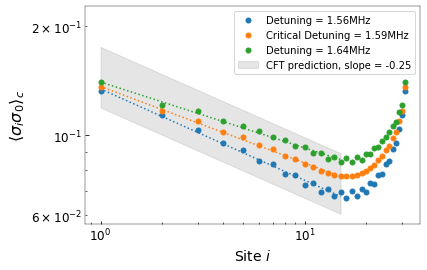

In [48]:
ms = 10
#plt.plot(x_list[i],sigma_2_list[i][75],marker = '.',ls = '' ,color='grey',ms = ms,label = 'Disordered state')
#plt.plot(x_list[i],sigma_2_list[i][-1],marker = '.',ls = '' ,color='black',ms = ms,label = 'Detuning = ')
for it,t_id in enumerate(range(crit_id_list[3]-10,crit_id_list[3]+20,10)):
    label_ = 'Detuning = %.2f' % detuning[i][t_id]+'MHz'
    if t_id == crit_id_list[3]:
        label_ = 'Critical Detuning = %.2f' % detuning[i][t_id]+'MHz'

    plt.plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' ,color='C%d'%it,ms = ms,label = label_)
    fit_range = int(N[i]/2-2)
    xdata = np.arange(1,fit_range)
    ydata = sigma_2_list[i][t_id,1:fit_range]
    print(ydata)
    params, params_covariance= curve_fit(power_law, xdata, ydata)
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])
    plt.plot(xfit, yfit, ':',color='C%d'%it)
y0 = power_law(xfit, 0.85*params[0], -0.25)
y1 = power_law(xfit, 1.25*params[0], -0.25)

plt.fill_between(xfit,y0,y1,color = 'grey',alpha = 0.2,label = 'CFT prediction, slope = -0.25')
plt.xlabel('Site $i$',fontsize=14)
plt.ylabel('$\langle\sigma_i\sigma_0\\rangle_c$',fontsize = 16)
plt.xscale('log')
plt.yscale('log')    
plt.tick_params(axis='both',direction='in',labelsize=12,which='both')
plt.legend(fontsize=10,frameon=True)
plt.rcParams['axes.linewidth'] = 0.4

plt.savefig("sigma_correlator.svg")


N = 20 crit detuning1.566012378688489

N = 24 crit detuning1.5697215477424928

N = 28 crit detuning1.5714889113825392

N = 32 crit detuning1.5694099686594922


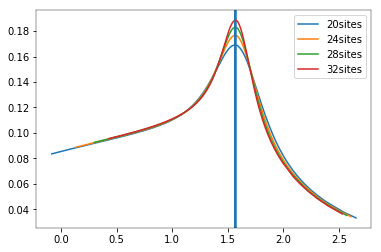

In [358]:
for i_n,i in enumerate(range(len(N))):
    print()
    temp =(-np.mean(zg_list[i],1)[50:-2]+np.mean(zg_list[i],1)[51:-1])/(detuning[i][51:-1]-detuning[i][50:-2])
    crit = np.argmax(temp)+50
    plt.plot(detuning[i][50:-2],temp,label = str(N[i])+'sites')
    plt.axvline(detuning[i][crit])
    print('N = '+str(len(x_list[i])),'crit detuning'+str(detuning[i][crit]))

#plt.yscale('log')
plt.legend()
#plt.ylim([0.1,0.8])

In [349]:
crit = np.argmax(temp)
crit

118

[]

SyntaxError: invalid syntax (<ipython-input-21-d3ea4644cad5>, line 1)

In [25]:
detuning[1][50:]

array([0.13137326, 0.1770006 , 0.22051937, 0.26207242, 0.30179   ,
       0.3397911 , 0.37618464, 0.4110705 , 0.44454048, 0.47667905,
       0.50756412, 0.53726762, 0.56585607, 0.59339111, 0.61992991,
       0.64552558, 0.6702275 , 0.6940817 , 0.71713107, 0.73941567,
       0.76097294, 0.78183792, 0.80204342, 0.82162023, 0.84059725,
       0.85900161, 0.87685885, 0.89419302, 0.91102677, 0.92738145,
       0.94327723, 0.95873317, 0.97376725, 0.98839653, 1.00263714,
       1.01650435, 1.03001268, 1.04317587, 1.05600697, 1.06851842,
       1.08072199, 1.09262892, 1.10424989, 1.11559509, 1.12667421,
       1.1374965 , 1.1480708 , 1.15840553, 1.16850875, 1.17838813,
       1.18805105, 1.19750454, 1.20675533, 1.21580988, 1.22467436,
       1.2333547 , 1.24185657, 1.25018542, 1.25834649, 1.26634479,
       1.27418514, 1.28187217, 1.28941035, 1.29680394, 1.30405708,
       1.31117372, 1.31815768, 1.32501265, 1.33174215, 1.33834961,
       1.34483832, 1.35121143, 1.35747203, 1.36362306, 1.36966

In [34]:
import random

In [38]:
random.randint(0,1000)

737